## Data Creation for Lab 9

Adding to the Lab 8 data

Artifically created dataset based on [this example](https://paulvanderlaken.com/2017/09/27/simpsons-paradox-two-hr-examples-with-r-code/). 

In [91]:
import numpy as np
import pandas as pd

%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import linear_model

In [46]:
employ_data = pd.read_csv("../Lab08/lab8data.csv")
employ_data.head()

,neuroticism,performance,job
0,3.199914,51.564036,technical
1,2.030238,49.450498,manager
2,4.269581,52.500872,technical
3,3.025011,42.019628,technical
4,2.661687,70.396598,manager


In [57]:
neuro = employ_data[["neuroticism"]].to_numpy()
perform = employ_data[["performance"]].to_numpy()
employ_data = employ_data.reindex(columns = ["neuroticism","performance","job","salary"])

In [80]:
salary = 500*((perform - 4*neuro)+ 3*np.array([3*np.random.normal(0,1,1000)]).T) + 90000

In [81]:
np.min(salary)

80798.18212988124

In [82]:
np.max(salary)

132184.25381918548

In [85]:
minds = employ_data["job"] == "manager"

In [86]:
sal_check = np.zeros([1000,1])
sal_check[minds] = 7000

In [87]:
sal2 = sal_check + salary

In [88]:
employ_data["salary"] = sal2

In [89]:
employ_data.to_csv("lab9data.csv", index=False)

<IPython.core.display.Javascript object>


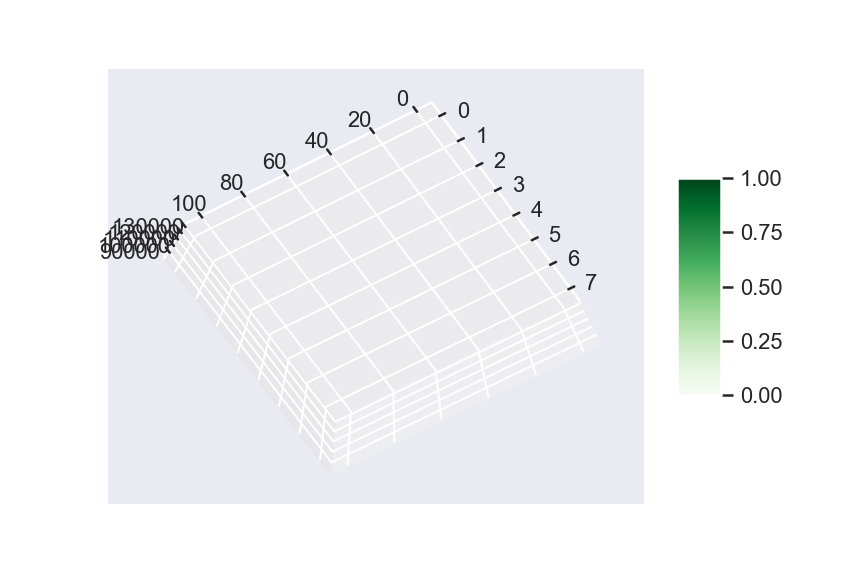

In [96]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot with colors
surf = ax.plot_surface(neuro, perform, salary, cmap="Greens",
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>


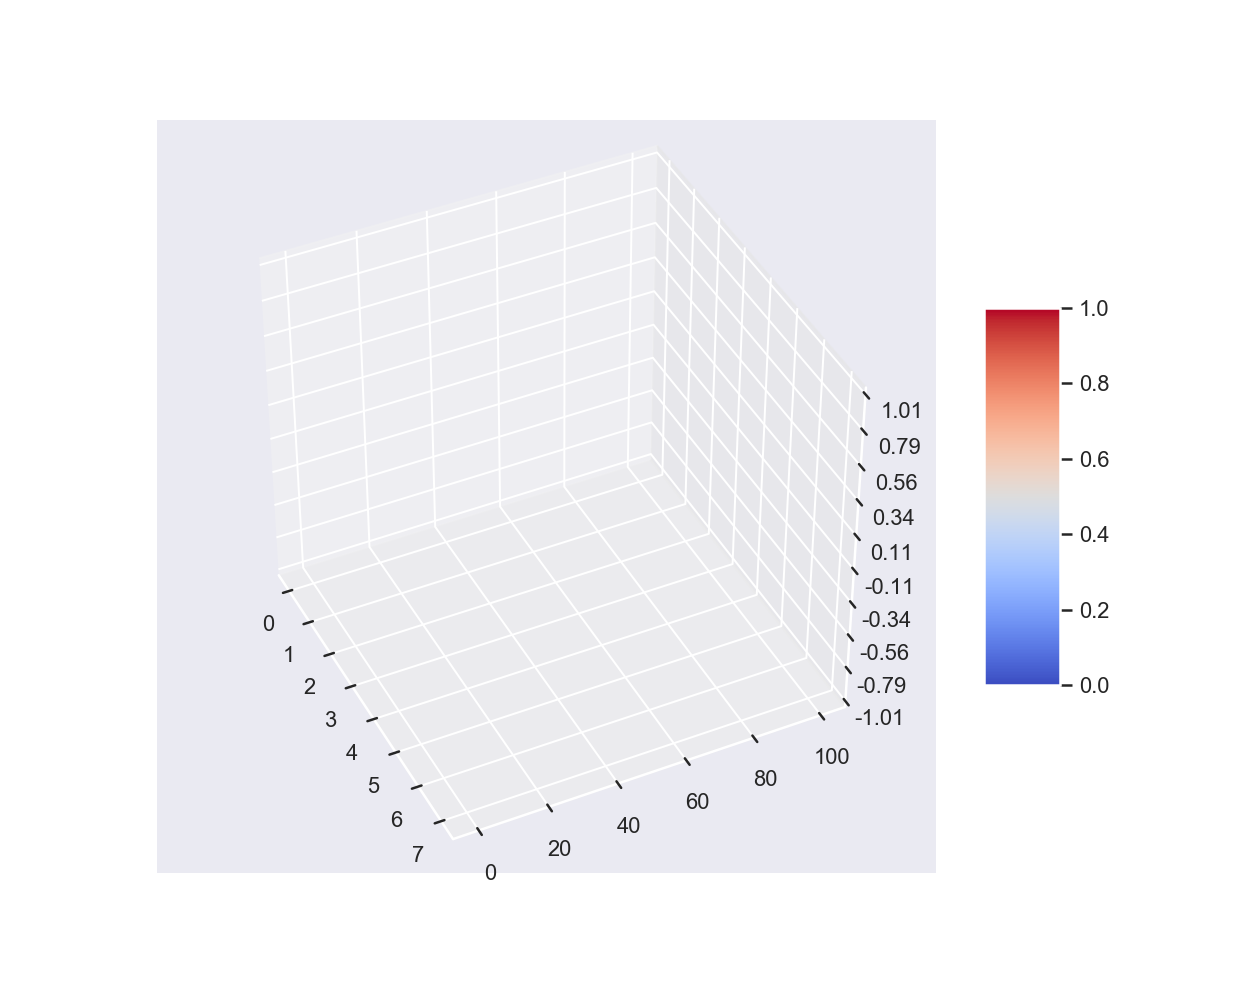

In [99]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(neuro, perform, salary, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Notes 

These are things that I'm not yet happy with. 

In [4]:
neuro.shape

(1000, 1)

In [10]:
educ = np.array([np.random.binomial(2,.5,1000)]).T

In [20]:
inds = (employ_data["neuroticism"] > 4)

In [47]:
employ_data = employ_data.reindex(columns = ["neuroticism","performance","job","education","salary"])

In [48]:
employ_data.head()


,neuroticism,performance,job,education,salary
0,3.199914,51.564036,technical,NaN,NaN
1,2.030238,49.450498,manager,NaN,NaN
2,4.269581,52.500872,technical,NaN,NaN
3,3.025011,42.019628,technical,NaN,NaN
4,2.661687,70.396598,manager,NaN,NaN


In [49]:
educ = employ_data["education"]
opts = ["grad", "undergrad","highschool"]

In [50]:
hinds = employ_data["neuroticism"] > 4.25
educ[hinds] = np.random.choice(opts, sum(hinds),replace=True, p = [0.7,0.2,0.1])
#= np.random.choice(opts, np.sum(Tech5), replace=True, p = [0.6,0.4])
#jobs[~Tech5] = np.random.choice(opts, (1000-sum(Tech5)),replace=True, p = [0.2,0.8])

//anaconda3/envs/CSC294/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
linds = employ_data["neuroticism"] < 1.5
educ[linds] = np.random.choice(opts, sum(linds),replace=True, p = [0.1,0.2,0.7])

In [52]:
educ.head()

0           NaN
1           NaN
2    highschool
3           NaN
4           NaN
Name: education, dtype: object

In [53]:
educ.fillna(-1)
minds = (educ == -1)
educ[minds] = np.random.choice(opts, sum(minds),replace=True, p = [0.2,0.6,0.2])

In [54]:
educ.value_counts()

grad          97
highschool    53
undergrad     42
Name: education, dtype: int64

In [55]:
educ

0             NaN
1             NaN
2      highschool
3             NaN
4             NaN
          ...    
995           NaN
996          grad
997          grad
998           NaN
999           NaN
Name: education, Length: 1000, dtype: object

In [44]:
employ_data["education"] = educ

In [45]:
employ_data["education"].value_counts()

grad          133
highschool    117
undergrad      67
Name: education, dtype: int64

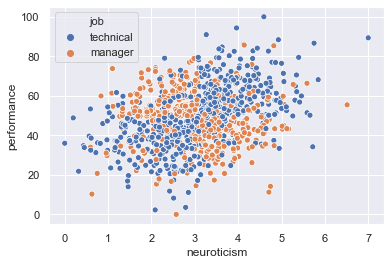

In [92]:
sea3 = sns.scatterplot(x="neuroticism", y="performance",hue ="job", data=employ_data)

In [93]:
employ_data.head()

,neuroticism,performance,job
0,3.199914,51.564036,technical
1,2.030238,49.450498,manager
2,4.269581,52.500872,technical
3,3.025011,42.019628,technical
4,2.661687,70.396598,manager


In [95]:
employ_data.to_csv("lab8data.csv", index=False)

In [108]:
employ_data.loc[employ_data["performance"] == 100]
#employ_data.loc[employ_data["neuroticism"] == 7]

,neuroticism,performance,job
791,4.593003,100.0,technical


#### Resources Consulted
0. [normal helpfile in numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html)
1. [choice in numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html)
2. [Pandas DataFrame: replace all values in a column, based on condition](https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition)
3. [Selecting Subsets of Data in Pandas: Part 2](https://www.dunderdata.com/blog/selecting-subsets-of-data-in-pandas-part-2)
4. [all in numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.all.html#numpy.all)
5. [any in numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.any.html)
6. [binomial in numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.binomial.html)
7. [Replace all NaN values with 0's in a column of Pandas dataframe](https://erikrood.com/Python_References/replace_nan_zero_final.html)
8. [3d plots in matplotlib](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)